# Creating data part2

#### y = Tx
#### Gaussian Noise
#### Export

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [2]:
df=pd.read_csv('data_lisse.csv', sep=',',header=None)
data = df.values

In [3]:
type(data)

numpy.ndarray

In [7]:
data.shape

(6795, 200)

#### y= Tx

In [8]:
# Physical data
l = 1
tau = 1
dep = 1
# Numerical data
nx = 200
dx = l/nx
T_op = dx*np.tri(nx, nx, 0, dtype=int).T

In [9]:
T_op.shape

(200, 200)

In [17]:
Npoint, nx = data.shape

In [18]:
y = np.zeros((Npoint,nx))
for i in range(Npoint):
    y[i] = T_op.dot(data[i])

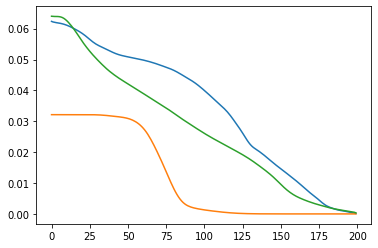

In [19]:
plt.plot(y[22])
plt.plot(y[55])
plt.plot(y[2000])

#### Gaussian noise

In [20]:
y_noise = np.zeros((Npoint,nx))
liste_histr = []
for i in range(Npoint):
    noise_vect = np.random.randn(nx)
    noise_vect = noise_vect/np.linalg.norm(noise_vect)
    y_noise[i] = y[i]+ 0.1*np.linalg.norm(y[i])*noise_vect
    liste_histr.append(y_noise[i])

In [21]:
len(liste_histr)

6795

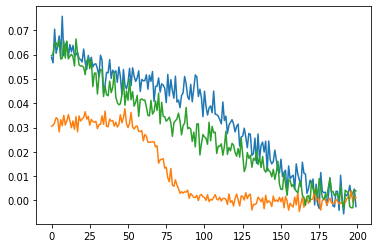

In [22]:
plt.plot(y_noise[22])
plt.plot(y_noise[55])
plt.plot(y_noise[2000])

####  Export

In [23]:
np.savetxt('data_blurred.csv', liste_histr, delimiter=', ', fmt='%12.8f')